Based on a post @ [Data Driven Investor](https://medium.com/datadriveninvestor/time-series-and-trend-analysis-6a4f255f3d6e).

## Time Series and Trend Analysis

"Time-dependent trends are a unique feature of time series analysis".

- "If the sequence of events matters, then you need to analyze possible trends".
- "These trends can ultimately be used for creating models that predict future values".

### Trends and Stationary

"Time series models work on the assumption that the series to be analyzed is [stationary](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322), or has a mean, variance, and covariance that are not functions of time".

- "It is extremely rare that you will load a time series dataset that fulfills all three principles of stationarity, you will have to remove these trends to achieve this goal".

- "You will still retain the valuable information of time dependent mean, variance, and covariance, [they will be applied later on](https://machinelearningmastery.com/time-series-trends-in-python/)".

- "Once these three factors are satisfied then you can move on to applying time series models to your dataset".


In [1]:
from IPython.display import Image

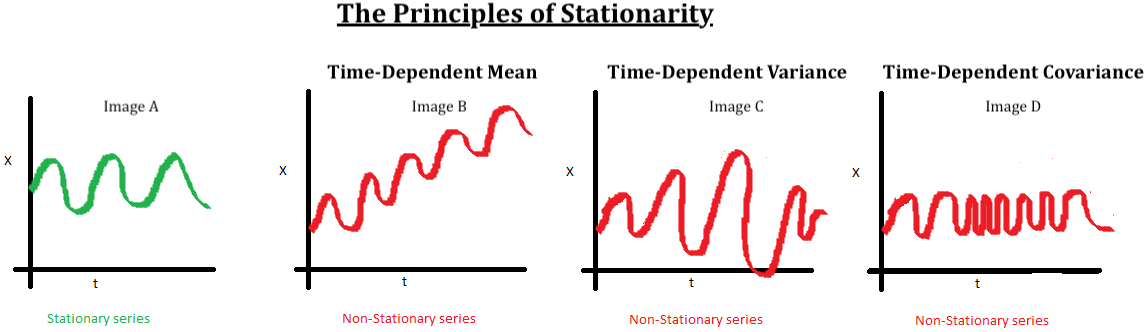

In [2]:
Image('./IMG/principles-of-stationarity.png')

"The above image illustrates the three principles of stationarity":

1. **Mean**: "The mean of the time series should not be a function of time, whether throughout the time series or during specific periods (seasonal). Image B depicts a series where the mean is growing over time and Image A depicts a series where the mean is constant throughout the time frame. A seasonal time dependent mean also counts against stationarity. The observations may oscillate around a mean but they cannot fluctuate as a function of time for the series to be considered stationary".

2. **Variance** (Homoscedasticity): "The variance of the observations must be constant throughout the time series. Image C depicts a series where the variance of the observations is a function of time, Image A depicts a series where the variance is constant throughout the series".

3. **Covariance**: "The covariance between two observations over a consistent time interval is not a function of time. In Image D the covariance between two variables fluctuates over time; it is smaller towards the middle compared to the rest of the series. The covariance is constant throughout the same interval in Image A".


### Dickey-Fuller Test

"One useful statistical test to check for stationarity is the [Dickey-Fuller Test](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test)".

- "In this test <u>the null hypothesis is that the given time series is not stationary</u> and the alternative hypothesis is that the series is stationary".

- "A time interval is selected to calculate the series’ rolling mean and rolling standard deviation".
    - "If the p-value falls below the critical value then we reject the null hypothesis".

##### CPB Example

The data was obtained from [this link](https://finance.yahoo.com/quote/CPB/history?p=CPB).

- Time period: 2019-12-31 to 2019-01-01.
- Show: Historical prices.
- Frequency: daily.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cpb = pd.read_csv('./CPB.csv')

In [5]:
cpb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,32.759998,32.880001,32.029999,32.259998,30.914936,3518900
1,2019-01-03,32.220001,33.080002,32.090000,32.660000,31.298265,3312900
2,2019-01-04,32.619999,33.110001,32.380001,32.840000,31.470758,2520400
3,2019-01-07,32.730000,33.900002,32.430000,33.689999,32.285316,3543600
4,2019-01-08,33.340000,33.750000,33.080002,33.590000,32.527409,2296900


In [6]:
cpb['Date'] = pd.to_datetime(cpb.Date)
cpb.columns = [col.replace(' ', '_').lower() for col in cpb.columns]

cpb = cpb.set_index('date').sort_index()
cpb.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2019-01-02,32.759998,32.880001,32.029999,32.259998,30.914936,3518900
2019-01-03,32.220001,33.080002,32.090000,32.660000,31.298265,3312900
2019-01-04,32.619999,33.110001,32.380001,32.840000,31.470758,2520400
2019-01-07,32.730000,33.900002,32.430000,33.689999,32.285316,3543600
2019-01-08,33.340000,33.750000,33.080002,33.590000,32.527409,2296900


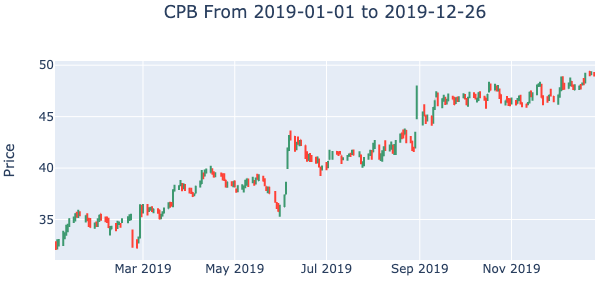

In [7]:
Image('./IMG/cpb-history.png')

"I selected a time interval of 20 days because that is how many trading days there are in a month".

- "I then utilized `pandas`' `.rolling()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) to obtain the rolling mean and variance of the series".

- "I then utilized StatsModel's implementation of the [Dickey-Fuller Test](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html)".
    - "The results were a p-value of $0.7469$ which means that I cannot reject the null hypothesis (the time series is not stationary)".
    - In this notebook, the time interval was different, and so was the p-value obtained: $0.788$.

In [8]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adfuller(cpb.adj_close)

(-0.9005114667440226,
 0.78780393766464,
 3,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 411.68691869640867)

"A visualization of the rolling mean and variance for Campbell’s price is below":

In [11]:
rolling_mean = cpb.adj_close.rolling(window=20).mean()
rolling_std = cpb.adj_close.rolling(window=20).std()

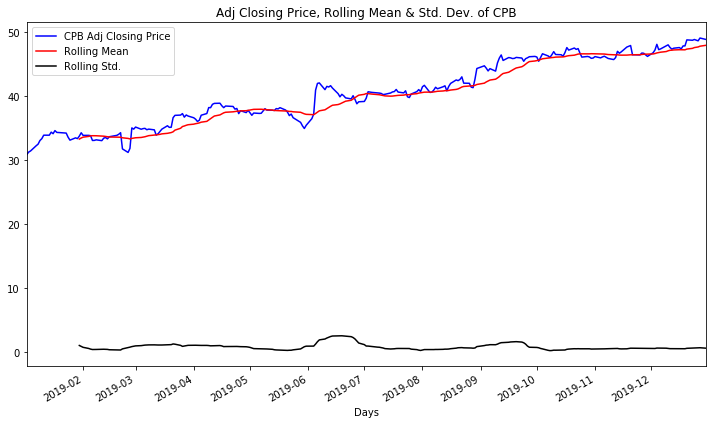

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

cpb.adj_close.plot(ax=ax, label='CPB Adj Closing Price', color='blue')

rolling_mean.plot(ax=ax, label='Rolling Mean', color='red')
rolling_std.plot(ax=ax, label='Rolling Std.', color='black')

ax.set_title('Adj Closing Price, Rolling Mean & Std. Dev. of CPB')
ax.set_xlabel('Days')
ax.legend()

plt.tight_layout()
plt.show()

***

Based on a post @ [Machine Learning Mastery](https://machinelearningmastery.com/time-series-trends-in-python/), referenced in the previous post.

## How to Use and Remove Trend Information from Time Series Data in Python

"A trend is a continued increase or decrease in the series over time".
- "There can be benefit in identifying, modeling, and even removing trend information from your time series dataset".

"In this tutorial, you will discover how to model and remove trend information from time series data in Python".

### Trends in Time Series

"'In general, a systematic change in a time series that does not appear to be periodic is known as a trend.'"

"Identifying and understanding trend information can aid in improving model performance; below are a few reasons":

- "**Faster Modeling**: Perhaps the knowledge of a trend or lack of a trend can suggest methods and make model selection and evaluation more efficient".

- "**Simpler Problem**: Perhaps we can correct or remove the trend to simplify modeling and improve model performance".

- "**More Data**: Perhaps we can use trend information, directly or as a summary, to provide additional information to the model and improve model performance."

### Types of Trends

"Two general classes that we may think about are":

- "**Deterministic Trends**: These are trends that consistently increase or decrease".

- "**Stochastic Trends**: These are trends that increase and decrease inconsistently".

"In general, deterministic trends are easier to identify and remove, but the methods discussed in this tutorial can still be useful for stochastic trends".

"We can think about trends in terms of their scope of observations".

- "**Global Trends**: These are trends that apply to the whole time series".

- "**Local Trends**: These are trends that apply to parts or subsequences of a time series".

"Generally, global trends are easier to identify and address".

### Identifying a Trend

"You can plot time series data to see if a trend is obvious or not".

- "The difficulty is that in practice, identifying a trend in a time series can be a subjective process. As such, extracting or removing it from the time series can be just as subjective".

- "Create line plots of your data and inspect the plots for obvious trends".

- "Add linear and nonlinear trend lines to your plots and see if a trend is obvious".

### Removing a Trend

"A time series with a trend is called non-stationary".

"An identified trend can be modeled".
- "Once modeled, it can be removed from the time series dataset".
- "This is called detrending the time series".

"If a dataset does not have a trend or we successfully remove the trend, the dataset is said to be trend stationary".

### Using Time Series Trends in Machine Learning

"From a machine learning perspective, a trend in your data represents two opportunities":

1. "**Remove Information**: To remove systematic information that distorts the relationship between input and output variables".
2. "**Add Information**: To add systematic information to improve the relationship between input and output variables".

"Specifically, a trend can be removed from your time series data (and data in the future) as a data preparation and cleaning exercise".
- "This is common when using statistical methods for time series forecasting, but does not always improve results when using machine learning models".

"Alternately, a trend can be added, either directly or as a summary, as a new input variable to the supervised learning problem to predict the output variable".


#### Shampoo Sales Dataset

The data set can be download [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv).

"This dataset describes the monthly number of sales of shampoo over a 3 year period."


In [43]:
shampoo = pd.read_csv('./shampoo.csv')

In [44]:
shampoo.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [45]:
shampoo['Date'] = pd.to_datetime('190' + shampoo.Month, format='%Y-%m')
shampoo = shampoo.drop(columns='Month')
shampoo = shampoo.set_index('Date')

In [46]:
shampoo.head()

,Sales
Date,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


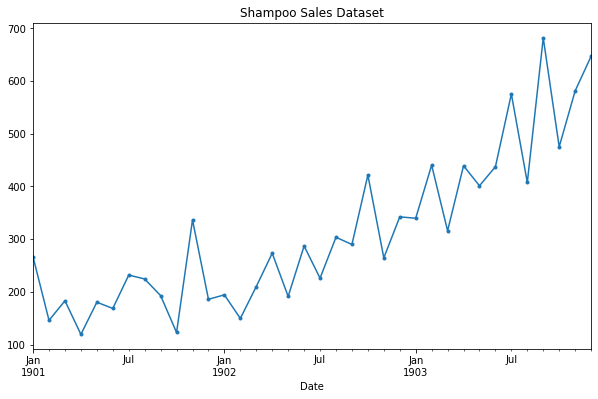

In [51]:
fig, ax = plt.subplots(figsize=(10,6))

shampoo.Sales.plot(ax=ax, marker='.')

ax.set_title('Shampoo Sales Dataset')

plt.show()

### Detrend by Differencing

"Specifically, a new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step".

$$
\text{value}(t) = \text{observation}(t) - \text{observation}(t-1)
$$

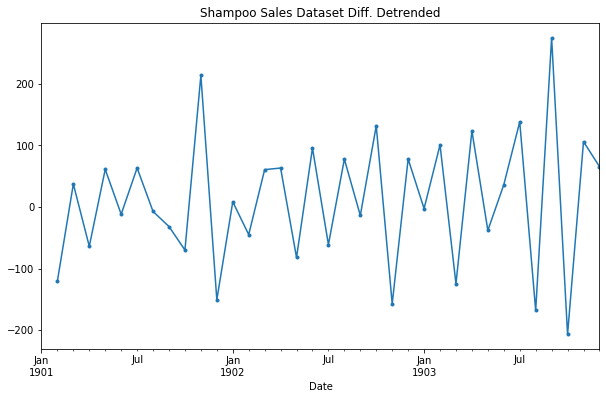

In [49]:
fig, ax = plt.subplots(figsize=(10,6))

shampoo.Sales.diff().plot(ax=ax, marker='.')

ax.set_title('Shampoo Sales Dataset Diff. Detrended')

plt.show()

"This approach works well for data with a linear trend".

- "If the trend is quadratic (the change in the trend also increases or decreases), then a difference of the already-differenced dataset can be taken, a second level of differencing".
- "This process can be further repeated if needed".

"Because differencing only requires the observation at the previous time step, it can easily be applied to unseen out-of-sample data to either preprocess or provide an additional input for supervised learning".

### Detrend by Model Fitting

"A trend is often easily visualized as a line through the observations".

"Linear trends can be summarized by a linear model, and nonlinear trends may be best summarized using a polynomial or other curve-fitting method".
- "Because of the subjective and domain-specific nature of identifying trends, this approach can help to identify whether a trend is present".

- "Even fitting a linear model to a trend that is clearly super-linear or exponential can be helpful".

- "In addition to being used as a trend identification tool, these fit models can also be used to detrend a time series".

"For example, a linear model can be fit on the time index to predict the observation. This dataset would look as follows":

| X | y    |
|---|------|
| 1 | obs1 |
| 2 | obs2 |
| 3 | obs3 |
| 4 | obs4 |
| 5 | obs5 |

"The predictions from this model will form a straight line that can be taken as the trend line for the dataset".

- "These predictions can also be subtracted from the original time series to provide a detrended version of the dataset".

$$
\text{value}(t) = \text{observation}(t) - \text{prediction}(t)
$$

- "The residuals from the fit of the model are a detrended form of the dataset. Polynomial curve fitting and other nonlinear models can also be used".

"We can implement this in Python by training a scikit-learn's `LinearRegression` [model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) on the data".

In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [56]:
X = np.arange(shampoo.shape[0]).reshape(-1,1)
y = shampoo.Sales.values.reshape(-1,1)

In [58]:
model = LinearRegression()

In [59]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Calculating trend:

In [60]:
trend = model.predict(X)

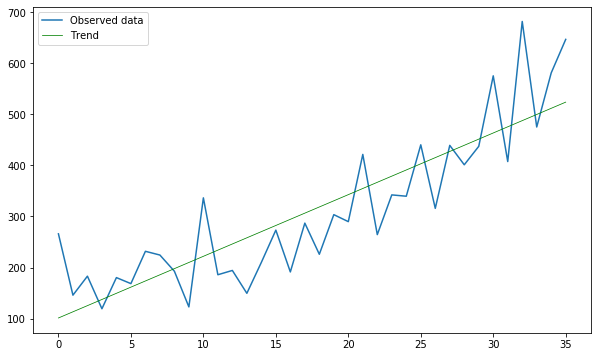

In [64]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(X, y, label='Observed data')
ax.plot(X, trend, label='Trend', color='g', lw='0.75')

ax.legend()

plt.show()

Detrending data:

In [65]:
detrended = y - trend

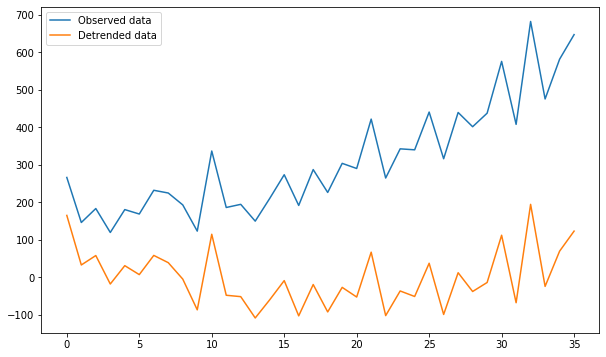

In [67]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(X, y, label='Observed data')
ax.plot(X, detrended, label='Detrended data')

ax.legend()

plt.show()